<a href="https://colab.research.google.com/github/LuisHenrique7/EnglishANKI/blob/main/An%C3%A1lise_de_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexão com o Drive e importando bibliotecas 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Instala e inporta as bibliotecas utilizadas

!pip install docx2python

from docx2python import docx2python
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Aplicação

## Leitura das tabelas

In [ ]:
def Concatena(listaStrings):
  if listaStrings == ['']:
    string = "-"
  else:
    string = ""
    for i, s in enumerate(listaStrings):
      if i == len(listaStrings) - 1:
        string += s
      else:
        string += s + ' '
  return string

In [ ]:
def MontaTabela(tabela):
  colunas = [column for column in tabela[0:1][0]]
  colunas = [Concatena(column) for column in colunas]
  data_frame = pd.DataFrame(tabela[1:])
  data_frame.columns = colunas
  for column in colunas:
    data_frame[column] = data_frame[column].apply(lambda x: Concatena(x))
  return data_frame

In [ ]:
def Captura_Dados_Doc(lista_titulos, lista_tabelas, documento):
  qtde_objetos_doc = len(documento.body)
  for indice in range(0, qtde_objetos_doc):
    objeto = documento.body[indice]
    if len(objeto) == 1: # É um título
      print(objeto)
      objeto = objeto[0][0]
      titulo = Concatena(objeto)
      lista_titulos.append(titulo.strip())
    else: # É uma tabela
      data_frame = MontaTabela(objeto)
      lista_tabelas.append(data_frame)

In [ ]:
part_one = ['/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Temas I.docx',
             '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Geral.docx',
             '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Músicas.docx',
             '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Revisões - Temas I.docx'
           ]

part_two = ['/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 2/Temas II.docx',
            '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 2/Geral II.docx'
             #'/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 2/Músicas II.docx'
           ]

spook_alice = ["/content/drive/MyDrive/Projeto Inglês/Tabelas/Spook's Alice/Spook's Alice Chapter I.docx"
           ]

path_list = part_one + part_two + spook_alice

path_list

# path_list = ['/content/Temas I.docx',
#              '/content/Geral.docx',
#              '/content/Músicas.docx'
#             ]

         #   '/content/drive/MyDrive/Projeto Inglês/Tabelas/Temas I.docx',

['/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Temas I.docx',
 '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Geral.docx',
 '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Músicas.docx',
 '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Revisões - Temas I.docx',
 '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 2/Temas II.docx',
 '/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 2/Geral II.docx',
 "/content/drive/MyDrive/Projeto Inglês/Tabelas/Spook's Alice/Spook's Alice Chapter I.docx"]

In [ ]:

lista_titulos = []
lista_tabelas = []
for doc_path in path_list:
  documento = docx2python(doc_path)
  Captura_Dados_Doc(lista_titulos, lista_tabelas, documento)

[[['Tabela Cozinha']]]
[[['', '', 'Tabela Quarto']]]
[[['', '', 'Tabela Banheiro']]]
[[['', '', 'Tabela Restaurante']]]
[[['']]]
[[['Tabela Geral']]]
[[['']]]
[[['Tabela Música III']]]
[[['', '', 'Tabela Música II']]]
[[['', '', 'Tabela Música I']]]
[[['']]]
[[['Revisão Quarto e Cozinha']]]
[[['']]]
[[['Tabela Floresta']]]
[[['']]]
[[['Tabela Geral II']]]
[[['']]]
[[['Chapter I']]]
[[['']]]


In [ ]:
lista_titulos = [x for x in lista_titulos if x != '-']
lista_titulos

['Tabela Cozinha',
 'Tabela Quarto',
 'Tabela Banheiro',
 'Tabela Restaurante',
 'Tabela Geral',
 'Tabela Música III',
 'Tabela Música II',
 'Tabela Música I',
 'Revisão Quarto e Cozinha',
 'Tabela Floresta',
 'Tabela Geral II',
 'Chapter I']

In [ ]:
lista_tabelas[0:2]

[   Quem inseriu Extra Palavras / Frases (Inglês)  \
 0             2     -                      Spoon   
 1             2     -                      Knife   
 2             2     -                      spice   
 3             2     -                    blender   
 4             -     -                      blend   
 ..          ...   ...                        ...   
 57            1     -                     grater   
 58            1     -                   strainer   
 59            1     -               knife holder   
 60            1     -                     fruits   
 61            1     -                      fruit   
 
                                              Tradução Contexto / Descrição  \
 0                                             Colher                     -   
 1                                        Faca, punhal                    -   
 2   tempero, especiaria, condimento, sabor, gosto,...                    -   
 3                         liquidificador, mis

In [ ]:
lista_tabelas[0]

,Quem inseriu,Extra,Palavras / Frases (Inglês),Tradução,Contexto / Descrição,Alexandre (1),Hortência (2),Luis (3),Sabrina (4)
0,2,-,Spoon,Colher,-,x,X,X,X
1,2,-,Knife,"Faca, punhal",-,x,X,X,X
2,2,-,spice,"tempero, especiaria, condimento, sabor, gosto,...",-,x,X,X,X
3,2,-,blender,"liquidificador, misturador",-,x,X,X,X
4,-,-,blend,"mistura, combinação, misturar, combinar",-,x,X,X,X
...,...,...,...,...,...,...,...,...,...
57,1,-,grater,ralador,-,x,X,X,X
58,1,-,strainer,"filtro, coador, peneira",-,x,X,X,X
59,1,-,knife holder,porta-faca,-,x,X,X,X
60,1,-,fruits,"frutas, frutos, resultados, produtos, consequê...",-,x,X,X,X


In [ ]:
documento.body[0][0][0]

['Chapter I']

## Verifica problemas no documento

In [ ]:
documento_0 = docx2python('/content/drive/MyDrive/Projeto Inglês/Tabelas/Parte 1/Temas I.docx')
len(documento_0.body)

25

In [ ]:
documento_0.body[4]

[[['', '', 'Tabela Banheiro']]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
len(documento.body)

27

In [ ]:
documento.body[4]

[[['Mosquito net']]]

## Leitura das tabelas (n rode)

In [ ]:
# Lê o arquivo usando o caminho do arquivo como parâmetro

endereco_documento = '/content/drive/MyDrive/Projeto Inglês/Tabelas/Temas I.docx'
# endereco_documento = '/content/drive/MyDrive/Projeto Inglês/Palavras - Frases.docx'
# endereco_documento = '/content/drive/MyDrive/Projeto Inglês/Tabelas/Geral.docx'
# endereco_documento = '/content/drive/MyDrive/Projeto Inglês/Tabelas/Músicas.docx'

documento = docx2python(endereco_documento)

In [ ]:
documento.body

[[[['Tabela Cozinha', '']]],
 [[['Quem inseriu'],
   ['Extra'],
   ['Palavras / Frases (Inglês)'],
   ['Tradução'],
   ['Contexto / Descrição'],
   ['Alexandre (1)'],
   ['Hortência (2)'],
   ['Luis (3)'],
   ['Sabrina (4)']],
  [['2'], [''], ['Spoon'], ['Colher '], [''], ['x'], ['X'], ['X'], ['X']],
  [['2'], [''], ['Knife'], ['Faca, punhal'], [''], ['x'], ['X'], ['X'], ['X']],
  [['2'],
   [''],
   ['spice'],
   ['tempero, especiaria, condimento, sabor, gosto, paladar'],
   [''],
   ['x'],
   ['X'],
   ['X'],
   ['X']],
  [['2'],
   [''],
   ['blender'],
   ['liquidificador, misturador '],
   [''],
   ['x'],
   ['X'],
   ['X'],
   ['X']],
  [['-'],
   [''],
   ['blend'],
   ['mistura, combinação, misturar, combinar'],
   [''],
   ['x'],
   ['X'],
   ['X'],
   ['X']],
  [['-'],
   [''],
   ['The cook blended the milk with the flour and the eggs.'],
   ['O cozinheiro misturou o leite com a farinha e os ovos.'],
   [''],
   ['x'],
   ['X'],
   ['x'],
   ['X']],
  [['2'],
   [''],
   ['c

In [ ]:
def Concatena(listaStrings):
  if listaStrings == ['']:
    string = "-"
  else:
    string = ""
    for i, s in enumerate(listaStrings):
      if i == len(listaStrings) - 1:
        string += s
      else:
        string += s + ' '
  return string

In [ ]:
def MontaTabela(tabela):
  colunas = [column for column in tabela[0:1][0]]
  colunas = [Concatena(column) for column in colunas]
  data_frame = pd.DataFrame(tabela[1:])
  data_frame.columns = colunas
  for column in colunas:
    data_frame[column] = data_frame[column].apply(lambda x: Concatena(x))
  return data_frame

In [ ]:
qtde_objetos_doc = len(documento.body)
lista_titulos = []
lista_tabelas = []

for indice in range(0, qtde_objetos_doc):
  objeto = documento.body[indice]
  if len(objeto) == 1: # É um título
    print(objeto)
    objeto = objeto[0][0]
    titulo = Concatena(objeto)
    lista_titulos.append(titulo.strip())
  else: # É uma tabela
    data_frame = MontaTabela(objeto)
    lista_tabelas.append(data_frame)

[[['Tabela Cozinha', '']]]
[[['', '', '', 'Tabela Quarto', '']]]
[[['', '', 'Tabela Banheiro', '']]]
[[['', '', 'Tabela Restaurante']]]
[[['']]]


In [ ]:
lista_titulos

['Tabela Cozinha',
 'Tabela Quarto',
 'Tabela Banheiro',
 'Tabela Restaurante',
 '-']

In [ ]:
lista_tabelas

[   Quem inseriu Extra  ... Luis (3) Sabrina (4)
 0             2     -  ...        X           X
 1             2     -  ...        X           X
 2             2     -  ...        X           X
 3             2     -  ...        X           X
 4             -     -  ...        X           X
 ..          ...   ...  ...      ...         ...
 57            1     -  ...        X           X
 58            1     -  ...        X           X
 59            1     -  ...        X           X
 60            1     -  ...        X           X
 61            1     -  ...        X           X
 
 [62 rows x 9 columns],    Quem inseriu Extra  ... Luis (3) Sabrina (4)
 0             4     -  ...        X           X
 1             4     -  ...        X           X
 2             -     -  ...        X           X
 3             -     -  ...        X           X
 4             -     -  ...        X           X
 ..          ...   ...  ...      ...         ...
 66            2     -  ...        X        

In [ ]:
lista_tabelas[0]

,Quem inseriu,Extra,Palavras / Frases (Inglês),Tradução,Contexto / Descrição,Alexandre (1),Hortência (2),Luis (3),Sabrina (4)
0,2,-,Spoon,Colher,-,x,X,X,X
1,2,-,Knife,"Faca, punhal",-,x,X,X,X
2,2,-,spice,"tempero, especiaria, condimento, sabor, gosto,...",-,x,X,X,X
3,2,-,blender,"liquidificador, misturador",-,x,X,X,X
4,-,-,blend,"mistura, combinação, misturar, combinar",-,x,X,X,X
...,...,...,...,...,...,...,...,...,...
57,1,-,grater,ralador,-,x,X,X,X
58,1,-,strainer,"filtro, coador, peneira",-,x,X,X,X
59,1,-,knife holder,porta-faca,-,x,X,X,X
60,1,-,fruits,"frutas, frutos, resultados, produtos, consequê...",-,x,X,X,X


In [ ]:
documento.body[0][0][0]

['', 'Tabela Geral']

## Computação da pontuação

In [ ]:
def User_Statistics_List():  
  dic_Alexandre = {'name/id':'Alexandre (1)', 'normal_point': 0, 'extra_point': 0, 'shared_point': 0, 'added': 0, 'not_added': 0,
                'total_score': 0}
                
  dic_Hortencia = {'name/id':'Hortência (2)', 'normal_point': 0, 'extra_point': 0, 'shared_point': 0, 'added': 0, 'not_added': 0,
                'total_score': 0}
                
  dic_Luis = {'name/id':'Luis (3)', 'normal_point': 0, 'extra_point': 0, 'shared_point': 0, 'added': 0, 'not_added': 0,
                'total_score': 0}
                
  dic_Sabrina = {'name/id':'Sabrina (4)', 'normal_point': 0, 'extra_point': 0, 'shared_point': 0, 'added': 0, 'not_added': 0,
                'total_score': 0}
                
  return [dic_Alexandre, dic_Hortencia, dic_Luis, dic_Sabrina]

In [ ]:
# Esta função percorre todas as linhas da tabela passada como parâmetro e aloca os pontos ao dicionário do
# usuário que inseriu a palavra na tabela. A pontuação compartilhada é retornada ao final da função pelo fato dessa pontuação ser
# distribuída para todos os usuários após a leitura de todas as linhas da tabela

def ComputaTabela(table, extra, table_statistics):
  shared_point = 0
  words = 0
  list_words = []
  for line_index in table.index:
    owner = table['Quem inseriu'][line_index]

    if table['Tradução'][line_index] != '-': # Se não for uma linha em branco
      words += 1
      word_or_phrase = table['Palavras / Frases (Inglês)'][line_index]
      list_words.append(word_or_phrase.strip()) # Armazena a palavra/frase na lista
      if '-' not in owner:
        owner = int(owner)
        dic_user = table_statistics[owner]
        # print(dic_user['name/id'], dic_user['extra_point'])
        if extra: # Se possui a coluna Extra
          if table['Extra'][line_index] != '-':
            dic_user['extra_point'] += 1
          else:
            dic_user['normal_point'] += 1
        else: # Se não possui a coluna Extra
          dic_user['normal_point'] += 1
      else:
          shared_point += 1
      for user in table_statistics[1:]: # Percorrendo os dicionários dos usuários para contabilizar as palavras adicionadas ao Anki
        column = user['name/id']
        if table[column][line_index] == '-':
          user['not_added'] += 1
        else:
          user['added'] += 1
  return shared_point, words, list_words

In [ ]:
lista_titulos

['Tabela Cozinha',
 'Tabela Quarto',
 'Tabela Banheiro',
 'Tabela Restaurante',
 'Tabela Geral',
 'Tabela Música III',
 'Tabela Música II',
 'Tabela Música I',
 'Revisão Quarto e Cozinha',
 'Tabela Floresta',
 'Tabela Geral II',
 'Chapter I']

In [ ]:
# Realiza a computação dos pontos dos usuários para cada tabela e armazena esses dados em table_statistics_list

index_lista_tabelas = len(lista_tabelas)
table_statistics_list = []
table_without_extra = ["Tabela Geral", "Revisão Quarto e Cozinha", "Tabela Geral II", "Chapter I"]

for index_table in range(0, index_lista_tabelas):
  table_statistics = User_Statistics_List()
  table_statistics.insert(0, [lista_titulos[index_table], 0]) # Insere na posição 0 uma lista com o título da tabela e a quantidade de palavras dela

  #if "Tabela Geral" in lista_titulos[index_table] or "Revisão Quarto e Cozinha" in lista_titulos[index_table] or "Tabela Geral II" in lista_titulos[index_table]:
  if lista_titulos[index_table] in table_without_extra:
    extra = False
  else:
    extra = True

  table = lista_tabelas[index_table]
  shared_point, words, list_words = ComputaTabela(table, extra, table_statistics)
  table_statistics[0][1] = words
  table_statistics.append(list_words)

  for user in table_statistics[1:5]:
    user['shared_point'] = shared_point
    user['total_score'] = user['normal_point'] + ((user['shared_point'] + user['extra_point']) / 2)

  table_statistics_list.append(table_statistics)
  print(lista_titulos[index_table])

Tabela Cozinha
Tabela Quarto
Tabela Banheiro
Tabela Restaurante
Tabela Geral
Tabela Música III
Tabela Música II
Tabela Música I
Revisão Quarto e Cozinha
Tabela Floresta
Tabela Geral II
Chapter I


In [ ]:
table_statistics

[['Chapter I', 117],
 {'added': 0,
  'extra_point': 0,
  'name/id': 'Alexandre (1)',
  'normal_point': 28,
  'not_added': 117,
  'shared_point': 1,
  'total_score': 28.5},
 {'added': 0,
  'extra_point': 0,
  'name/id': 'Hortência (2)',
  'normal_point': 21,
  'not_added': 117,
  'shared_point': 1,
  'total_score': 21.5},
 {'added': 5,
  'extra_point': 0,
  'name/id': 'Luis (3)',
  'normal_point': 45,
  'not_added': 112,
  'shared_point': 1,
  'total_score': 45.5},
 {'added': 0,
  'extra_point': 0,
  'name/id': 'Sabrina (4)',
  'normal_point': 22,
  'not_added': 117,
  'shared_point': 1,
  'total_score': 22.5},
 ['about',
  'apprentice',
  'learner',
  'novice',
  'I do not know the rules of the game because I am a novice.',
  'Upon completion of the course, the learners take an exam.',
  'as',
  'assassin',
  'background',
  'There is a castle in the background of the picture.',
  'The candidate got the job due to her strong academic background.',
  'It is important to understand the h

In [ ]:
# Computa a pontuação geral de cada usuário, pegando as suas pontuações em cada tabela e armazenando o somatório de suas
# pontuações na lista de dicionários user_list

user_list = User_Statistics_List()
key_list = list(user_list[0].keys()) # Lista de chaves do dicionário do usuário 1, que é igual para todos os usuários
key_list.remove('name/id') # Remove da lista a chave que não será alterada
total_amount_of_words = 0 # Quantidade total de palavras 

for table_statistics in table_statistics_list: # Percorre a lista de estatisticas de cada tabela
  total_amount_of_words += table_statistics[0][1] # Somatório da quantidade de palavras de cada tabela
  for user_index in range(1, len(table_statistics)-1): # Percorre o dicionário de todos os usuários => 1 até 5
    user_list_index = user_index - 1 # A user_list possui usuários na posição 0 enquanto a table_statistics os usuários estão a partir da posição 1
    user_dict = user_list[user_list_index] # Dicionário geral do usuário

    for key in key_list: # Percorre a lista de chaves para unir os valores de todas as estatísticas das tabelas para cada usuário
      user_dict[key] += table_statistics[user_index][key]

meta = 180

for user in user_list:
  user['score_average'] = (user['total_score'] / meta) * 10 # Se foi colocada a quantidade igual a meta a pontuação média é igual a 10
  user['total_average'] = user['score_average'] * (user['added'] / total_amount_of_words) # A média total também é composta pela porcentagem de palavras
                                                                                          # adicionadas em relação ao total de palavras

In [ ]:
for user in user_list:
  print(user)

{'name/id': 'Alexandre (1)', 'normal_point': 219, 'extra_point': 2, 'shared_point': 37, 'added': 400, 'not_added': 764, 'total_score': 238.5, 'score_average': 13.25, 'total_average': 4.553264604810996}
{'name/id': 'Hortência (2)', 'normal_point': 188, 'extra_point': 1, 'shared_point': 37, 'added': 600, 'not_added': 564, 'total_score': 207.0, 'score_average': 11.5, 'total_average': 5.927835051546391}
{'name/id': 'Luis (3)', 'normal_point': 383, 'extra_point': 21, 'shared_point': 37, 'added': 450, 'not_added': 714, 'total_score': 412.0, 'score_average': 22.888888888888886, 'total_average': 8.848797250859105}
{'name/id': 'Sabrina (4)', 'normal_point': 310, 'extra_point': 3, 'shared_point': 37, 'added': 546, 'not_added': 618, 'total_score': 330.0, 'score_average': 18.333333333333332, 'total_average': 8.599656357388316}


## Tabelas

In [ ]:
total_score_list = []
for table in table_statistics_list:
  table_title = table[0][0]
  table_score = [table_title]
  for user in table[1:5]:
    score = user['total_score']
    table_score.append(score)
  table_score.append(user['shared_point'])  # Pega apenas do último user, pois o valor é o mesmo para todos
  total_score_list.append(table_score)

In [ ]:
total_score_list

[['Tabela Cozinha', 16.0, 16.5, 19.0, 18.5, 10],
 ['Tabela Quarto', 21.5, 19.0, 20.5, 22.0, 18],
 ['Tabela Banheiro', 13.0, 11.5, 13.5, 15.0, 3],
 ['Tabela Restaurante', 14.5, 13.5, 15.5, 13.0, 5],
 ['Tabela Geral', 84.0, 73.0, 180.0, 145.0, 0],
 ['Tabela Música III', 10.0, 10.0, 15.0, 12.0, 0],
 ['Tabela Música II', 12.0, 8.0, 7.0, 6.0, 0],
 ['Tabela Música I', 11.0, 5.0, 12.0, 17.0, 0],
 ['Revisão Quarto e Cozinha', 28.0, 29.0, 49.0, 59.0, 0],
 ['Tabela Floresta', 0.0, 0.0, 0.0, 0.0, 0],
 ['Tabela Geral II', 0.0, 0.0, 35.0, 0.0, 0],
 ['Chapter I', 28.5, 21.5, 45.5, 22.5, 1]]

In [ ]:
for table_score in total_score_list:
  print(table_score[0])
  print(f"Alexandre = {table_score[1]}, Hortência = {table_score[2]}, Luis = {table_score[3]}, Sabrina = {table_score[4]}")
  print(f"Pontuação Compartilhada = {table_score[5]}\n\n")

Tabela Cozinha
Alexandre = 16.0, Hortência = 16.5, Luis = 19.0, Sabrina = 18.5
Pontuação Compartilhada = 10


Tabela Quarto
Alexandre = 21.5, Hortência = 19.0, Luis = 20.5, Sabrina = 22.0
Pontuação Compartilhada = 18


Tabela Banheiro
Alexandre = 13.0, Hortência = 11.5, Luis = 13.5, Sabrina = 15.0
Pontuação Compartilhada = 3


Tabela Restaurante
Alexandre = 14.5, Hortência = 13.5, Luis = 15.5, Sabrina = 13.0
Pontuação Compartilhada = 5


Tabela Geral
Alexandre = 84.0, Hortência = 73.0, Luis = 180.0, Sabrina = 145.0
Pontuação Compartilhada = 0


Tabela Música III
Alexandre = 10.0, Hortência = 10.0, Luis = 15.0, Sabrina = 12.0
Pontuação Compartilhada = 0


Tabela Música II
Alexandre = 12.0, Hortência = 8.0, Luis = 7.0, Sabrina = 6.0
Pontuação Compartilhada = 0


Tabela Música I
Alexandre = 11.0, Hortência = 5.0, Luis = 12.0, Sabrina = 17.0
Pontuação Compartilhada = 0


Revisão Quarto e Cozinha
Alexandre = 28.0, Hortência = 29.0, Luis = 49.0, Sabrina = 59.0
Pontuação Compartilhada = 0


T

In [ ]:
pd.DataFrame(total_score_list, columns=['Tema', 'Alexandre (1)', 'Hortência (2)', 'Luis (3)', 'Sabrina (4)', 'Pontuação Compartilhada'])

,Tema,Alexandre (1),Hortência (2),Luis (3),Sabrina (4),Pontuação Compartilhada
0,Tabela Cozinha,16.0,16.5,19.0,18.5,10
1,Tabela Quarto,21.5,19.0,20.5,22.0,18
2,Tabela Banheiro,13.0,11.5,13.5,15.0,3
3,Tabela Restaurante,14.5,13.5,15.5,13.0,5
4,Tabela Geral,84.0,73.0,180.0,145.0,0
5,Tabela Música III,10.0,10.0,15.0,12.0,0
6,Tabela Música II,12.0,8.0,7.0,6.0,0
7,Tabela Música I,11.0,5.0,12.0,17.0,0
8,Revisão Quarto e Cozinha,28.0,29.0,49.0,59.0,0
9,Tabela Floresta,0.0,0.0,0.0,0.0,0


In [ ]:
table_statistics_list[2]

[['Tabela Banheiro', 54],
 {'added': 54,
  'extra_point': 1,
  'name/id': 'Alexandre (1)',
  'normal_point': 11,
  'not_added': 0,
  'shared_point': 3,
  'total_score': 13.0},
 {'added': 54,
  'extra_point': 0,
  'name/id': 'Hortência (2)',
  'normal_point': 10,
  'not_added': 0,
  'shared_point': 3,
  'total_score': 11.5},
 {'added': 54,
  'extra_point': 6,
  'name/id': 'Luis (3)',
  'normal_point': 9,
  'not_added': 0,
  'shared_point': 3,
  'total_score': 13.5},
 {'added': 54,
  'extra_point': 1,
  'name/id': 'Sabrina (4)',
  'normal_point': 13,
  'not_added': 0,
  'shared_point': 3,
  'total_score': 15.0},
 ['Shower',
  'I take a shower       every morning',
  'Water',
  'Drinking water is a vital necessity',
  'Sink',
  'The bathroom sink is white',
  'Towel',
  'I dry my face on the towel',
  'Mirror',
  'The mirror reflected a beam of light onto the wall',
  'Conditioner',
  'After shampooing I use conditioner',
  'Soap',
  'I always use the same brand of soap',
  'Toilet',
  'T

## Buscar palavras para revisão

In [ ]:
table_contents = table_statistics_list[0][5]

In [ ]:
table_contents

['Spoon',
 'Knife',
 'spice',
 'blender',
 'blend',
 'The cook blended the milk with the flour and the eggs.',
 'cup',
 'peel',
 'The peel of an orange is darker than the fruit inside.',
 'peeler',
 'bakery',
 'dispensation',
 'phosphor',
 'meter',
 'gas',
 'I put the cutlery and dishes in the dishwasher',
 'trash',
 'bin',
 'garbage',
 'The tabloid had a bad reputation for publishing garbage.',
 'garbageman',
 'lid',
 'I forced the lid to open the jam pot',
 'tray',
 'I keep some food on the tray',
 'chair',
 'I bought new chairs for my kitchen',
 'refrigerator',
 'ice',
 'I put ice in the juice',
 'lighter',
 'fire',
 'I always light the fire with a lighter',
 'sieve',
 'kitchen',
 'I spent two hours in the kitchen, baking a cake.',
 'A room or area where food is prepared and cooked.',
 'cooked',
 'faucet',
 'The sink faucet is leaking a lot of water.',
 'tap',
 'A tap on the screen will pause the video.',
 'I need to tap my full potential to achieve my goals.',
 'fridge',
 'microwav

In [ ]:
# Captura as palavras que já possuem tradução
translated_words = []

for table_statistics in table_statistics_list:
  table_contents = table_statistics[5]
  words_list = []
  phrase_list = []
  for content in table_contents:
    if len(content.split()) <= 2:
      words_list.append(content.lower())
      translated_words.append(content.lower())
    else:
      phrase_list.append(content.lower())
  table_statistics[5] = [words_list, phrase_list]

In [ ]:
table_statistics_list[0]

[['Tabela Cozinha', 62],
 {'added': 62,
  'extra_point': 0,
  'name/id': 'Alexandre (1)',
  'normal_point': 11,
  'not_added': 0,
  'shared_point': 10,
  'total_score': 16.0},
 {'added': 62,
  'extra_point': 1,
  'name/id': 'Hortência (2)',
  'normal_point': 11,
  'not_added': 0,
  'shared_point': 10,
  'total_score': 16.5},
 {'added': 62,
  'extra_point': 2,
  'name/id': 'Luis (3)',
  'normal_point': 13,
  'not_added': 0,
  'shared_point': 10,
  'total_score': 19.0},
 {'added': 62,
  'extra_point': 1,
  'name/id': 'Sabrina (4)',
  'normal_point': 13,
  'not_added': 0,
  'shared_point': 10,
  'total_score': 18.5},
 [['spoon',
   'knife',
   'spice',
   'blender',
   'blend',
   'cup',
   'peel',
   'peeler',
   'bakery',
   'dispensation',
   'phosphor',
   'meter',
   'gas',
   'trash',
   'bin',
   'garbage',
   'garbageman',
   'lid',
   'tray',
   'chair',
   'refrigerator',
   'ice',
   'lighter',
   'fire',
   'sieve',
   'kitchen',
   'cooked',
   'faucet',
   'tap',
   'fridge'

In [ ]:
a = '      liquid soap'
a = a.lstrip()
print(a)

liquid soap


In [ ]:
# Ordena as palavras e tira os espaços vazios à esquerda das palavras

translated_words.sort()
for i in range(0, len(translated_words)):
  word = translated_words[i]
  if word[0] != " ":
    break
  translated_words[i] = word.lstrip()
translated_words.sort()
translated_words

['a',
 'a denial',
 'a lot',
 'able',
 'about',
 'absorb',
 'absorbed',
 'access',
 'account',
 'achieve',
 'achieved',
 'actually',
 'adding',
 'adhere',
 'affine',
 'after',
 'after all',
 'again',
 'age',
 'ahead',
 'air-conditioned space',
 'alcohol',
 'alight',
 'all',
 'already',
 'also',
 'always',
 'am',
 'amount',
 'ample',
 'an',
 'and',
 'anymore',
 'apprentice',
 'apron',
 'are',
 'area',
 'around',
 'as',
 'asked',
 'assassin',
 'at',
 'attention',
 'augmentation',
 'avoid',
 'avoided',
 'baby',
 'back',
 'background',
 'backpack',
 'bacteria',
 'bad',
 'bag',
 'bake',
 'bakery',
 'baking',
 'bank',
 'basis',
 'basket',
 'bathroom',
 'beam',
 'because',
 'bed',
 'bedroom',
 'been',
 'before',
 'behalf',
 'behave',
 'behind',
 'being',
 'bin',
 'birthday',
 'blanket',
 'blend',
 'blended',
 'blender',
 'blow',
 'body',
 'boiled',
 'bony',
 'book',
 'booked',
 'books',
 'boot',
 'bought',
 'bound',
 'brand',
 'brighness',
 'broken',
 'brought',
 'brush',
 'brushes',
 'brushi

In [ ]:
a = table_statistics_list[0][5][1].copy()
a.sort()

In [ ]:
for table_statistics in table_statistics_list:
  print(table_statistics[0][0])

Tabela Cozinha
Tabela Quarto
Tabela Banheiro
Tabela Restaurante
Tabela Geral
Tabela Música III
Tabela Música II
Tabela Música I
Revisão Quarto e Cozinha
Tabela Floresta
Tabela Geral II
Chapter I


In [ ]:
for table_statistics in table_statistics_list:
  if "Cozinha" in table_statistics[0][0]: # Quero pegar apenas as palavras do restaurante
    phrase_list = table_statistics[5][1]
    words_list = []
    for phrase in phrase_list:
      for word in phrase.split():
        if word not in words_list:
          words_list.append(word.strip('.').strip(',').strip('?').strip('!').strip(';').strip('"'))
    words_list.sort()
    uncovered_words = []
    count = 0
    print(table_statistics[0][0])
    for word in words_list:
      if word not in translated_words:
        translated_words.append(word)
        uncovered_words.append(word)
        print(word)
        count += 1
    print(count)
    print('\n\n')

Tabela Cozinha
0



Revisão Quarto e Cozinha
accounts
aircraft
appraisal
arrival
assignment
ate
attract
audit
author
banks
become
bestseller
better
biology
bridge
calming
caused
clear
college
company's
concern
confidence
confuse
contract
correctly
countries
country
countryside
covered
customers
dice
did
dinner
dogs
easy
evenly
fair
faithful
family
fine
get
gold
good
high
horse's
house
imminent
instructions
interest
inventor
investors
juicy
just
keys
label
landing
language
large
letters
loves
luck
maintenance
manuscript
masters
more
music
must
narrows
night
no
novel
offers
our
parties
peace
peaceful
planet
police
prefers
present
printer
protect
pure
rained
rarely
rate
recording
requires
reviewed
rider
river
roadblock
rocks
salt
saturdays
save
saw
sea
seals
sent
silk
singer
singing
situation
six
snow
songs
spaced
speak
stress
student
studied
sugar
support
tables
tender
term
test
thanked
they
try
uncle
understood
valid
village
visible
weather
week
wonderfully
works
writer
year
years
133



In [ ]:
print(count // 4)
print(count % 4)
(count // 4) * 4

33
1


132

In [ ]:
'1???5?'.strip('?')

'1???5'

In [ ]:
'????1???5?'.strip('?')

'1???5'

In [ ]:
len(uncovered_words)

133

In [ ]:
# Lista de palavras de cada usuário

inicio = 0
fim = count // 4
for limite in range (fim, (fim*4)+1, fim):
  print(inicio, limite)
  print(uncovered_words[inicio : limite])
  inicio += fim

0 33
['accounts', 'aircraft', 'appraisal', 'arrival', 'assignment', 'ate', 'attract', 'audit', 'author', 'banks', 'become', 'bestseller', 'better', 'biology', 'bridge', 'calming', 'caused', 'clear', 'college', "company's", 'concern', 'confidence', 'confuse', 'contract', 'correctly', 'countries', 'country', 'countryside', 'covered', 'customers', 'dice', 'did', 'dinner']
33 66
['dogs', 'easy', 'evenly', 'fair', 'faithful', 'family', 'fine', 'get', 'gold', 'good', 'high', "horse's", 'house', 'imminent', 'instructions', 'interest', 'inventor', 'investors', 'juicy', 'just', 'keys', 'label', 'landing', 'language', 'large', 'letters', 'loves', 'luck', 'maintenance', 'manuscript', 'masters', 'more', 'music']
66 99
['must', 'narrows', 'night', 'no', 'novel', 'offers', 'our', 'parties', 'peace', 'peaceful', 'planet', 'police', 'prefers', 'present', 'printer', 'protect', 'pure', 'rained', 'rarely', 'rate', 'recording', 'requires', 'reviewed', 'rider', 'river', 'roadblock', 'rocks', 'salt', 'satur

In [ ]:
# Palavras restantes

uncovered_words[inicio:]

[]

In [ ]:
all
am
ample
attention
baby
back
because
birthday
booked
books
boot
bought
can
car
carefully
cat
children
clean
clothes
computer
achieve
an
area
bad
bake
baking
blended
cake
chairs


constant
darkness
decoration
demand
desert
do
doll
down
except
father
five
flashed
flat
from
gave
green
guard
guests
hairs
hang
husband
darker
dishwasher
eggs
flour
forced
freezer
goals
had
he



laid
lamps
lets
likes
live
living
london
luggage
lying
main
mother
necklace
not
once
one
out
outside
parents
pillows
play
hours
jam
juice
leaking
microwaved
orange
pause
pot
potential
where


plenty
quiet
read
rod
rolled
sat
see
single
soft
spacious
special
studying
switched
technical
terms
their
then
transparent
understand
with
prepared
publishing
reputation
screen
spent
steak
tabloid
than
video

## Captura de palavras desconhecidas num texto

In [ ]:
ignored_words = "– Tom Alice Lizzie Gregory Grimalkin Fiend’s Spook’s"

In [ ]:
ignored_words = ignored_words.lower()
ignored_words = ignored_words.split()
ignored_words

['–', 'tom', 'alice', 'lizzie', 'gregory', 'grimalkin', 'fiend’s', 'spook’s']

In [ ]:
know_words = translated_words + ignored_words

In [ ]:
# Digite o trecho em inglês aqui para capturar as palavras que ainda precisão ser traduzidas
search_string = "I WAS BEING trained as a witch, wasn’t I, when I first met Tom Ward, the Spook’s apprentice. We should have been enemies, but after a very uncertain start we ended up friends. I helped him and fought the dark by his side, and it was during that time that I learned a terrible truth about myself – I was one of the Fiend’s daughters, and Bony Lizzie was actually my mother. But I carried on helping Tom and Old Gregory, the Spook. Despite my background I couldn’t let myself go over to the dark. We fought the Fiend together, with the help of Grimalkin, the witch assassin, and eventually we dealt him a terrible blow: we chopped off his head and bound his body with silver spears so that he was trapped within his dead flesh."


search_string = "Knowing that his servants would pursue us relentlessly, Grimalkin went on the run with the Fiend’s head wrapped in a leather bag, fighting any creature she encountered. It would only be a matter of time before she was caught, I was sure – not even the powerful witch assassin could defeat so many dark entities. Once they killed Grimalkin and retrieved the head, they would take it back to Ireland and reunite it with the rest of the Fiend’s body; then he would be set loose in the world once more and a new age of darkness and terror would begin. \
There is just one chance to stop him – just one way to destroy him for ever. My friend Tom Ward has to complete a sacrificial ritual at midnight next Halloween, now less than four months away. It involves the use of three blades known as the hero swords. Tom already has two of these weapons in his possession, but the third is located in the dark, and it is up to me to retrieve it."

print(search_string)

Knowing that his servants would pursue us relentlessly, Grimalkin went on the run with the Fiend’s head wrapped in a leather bag, fighting any creature she encountered. It would only be a matter of time before she was caught, I was sure – not even the powerful witch assassin could defeat so many dark entities. Once they killed Grimalkin and retrieved the head, they would take it back to Ireland and reunite it with the rest of the Fiend’s body; then he would be set loose in the world once more and a new age of darkness and terror would begin. There is just one chance to stop him – just one way to destroy him for ever. My friend Tom Ward has to complete a sacrificial ritual at midnight next Halloween, now less than four months away. It involves the use of three blades known as the hero swords. Tom already has two of these weapons in his possession, but the third is located in the dark, and it is up to me to retrieve it.


In [ ]:
know_count = 0
new_words_list = []

for word in search_string.split():
  word = word.strip('.').strip(',').strip('?').strip('!').strip(';').strip('"').strip(':')
  word = word.lower()
  if word in know_words: # Se já sei a palavra
    know_count += 1
  else:
    new_words_list.append(word)

In [ ]:
know_count

112

In [ ]:
new_words_list = set(new_words_list)
new_words_list

{'any',
 'away',
 'be',
 'begin',
 'blades',
 'caught',
 'chance',
 'complete',
 'could',
 'creature',
 'defeat',
 'destroy',
 'encountered',
 'entities',
 'even',
 'ever',
 'fighting',
 'four',
 'friend',
 'halloween',
 'hero',
 'involves',
 'ireland',
 'killed',
 'knowing',
 'known',
 'leather',
 'less',
 'located',
 'loose',
 'matter',
 'midnight',
 'months',
 'possession',
 'powerful',
 'pursue',
 'relentlessly',
 'rest',
 'retrieve',
 'retrieved',
 'reunite',
 'ritual',
 'run',
 'sacrificial',
 'servants',
 'she',
 'stop',
 'sure',
 'swords',
 'terror',
 'these',
 'third',
 'three',
 'us',
 'way',
 'weapons',
 'world',
 'would',
 'wrapped'}

In [ ]:
len(new_words_list)

59

In [ ]:
# Lista de palavras de cada usuário

new_words_dict = {'Alexandre': [], 'Hortência': [], 'Luis': [], 'Sabrina': []}

inicio = 0
fim = len(new_words_list) // 4
index = 0
for limite in range (fim, (fim*4)+1, fim):
  print(inicio, limite)
  print(list(new_words_list)[inicio : limite])
  user = list(new_words_dict.keys())[index]
  new_words_dict[user] = list(new_words_list)[inicio : limite]
  inicio += fim
  index += 1

0 14
['possession', 'months', 'fighting', 'four', 'ever', 'ireland', 'matter', 'killed', 'encountered', 'run', 'terror', 'begin', 'be', 'chance']
14 28
['retrieve', 'even', 'us', 'entities', 'rest', 'knowing', 'caught', 'way', 'she', 'stop', 'ritual', 'hero', 'less', 'three']
28 42
['these', 'leather', 'sure', 'pursue', 'creature', 'wrapped', 'defeat', 'powerful', 'retrieved', 'complete', 'weapons', 'reunite', 'third', 'swords']
42 56
['sacrificial', 'halloween', 'relentlessly', 'loose', 'involves', 'known', 'destroy', 'world', 'midnight', 'friend', 'would', 'any', 'blades', 'servants']


In [ ]:
# Palavras restantes

list(new_words_list)[inicio:]

['away', 'could', 'located']

In [ ]:
for w in new_words_dict['Alexandre']:
  print(w)

possession
months
fighting
four
ever
ireland
matter
killed
encountered
run
terror
begin
be
chance
retrieve


In [ ]:
for w in new_words_dict['Hortência']:
  print(w)

even
us
entities
rest
knowing
caught
way
fiend’s
she
stop
ritual
hero
less
three
these


In [ ]:
for w in new_words_dict['Luis']:
  print(w)

leather
sure
pursue
creature
wrapped
defeat
powerful
retrieved
complete
weapons
reunite
third
swords
sacrificial
halloween


In [ ]:
for w in new_words_dict['Sabrina']:
  print(w)

relentlessly
loose
involves
known
destroy
world
midnight
friend
would
any
blades
servants
away
could
located


In [ ]:
a = ['about',
 'apprentice',
 'as',
 'assassin',
 'background',
 'being',
 'blow:',
 'body',
 'bony',
 'bound',
 'but',
 'by',
 'chopped',
 'couldn’t',
 'dark',
 'daughters',
 'dead',
 'dealt',
 'despite',
 'ended',
 'enemies',
 'eventually',
 'fiend',
 'fiend’s',
 'first',
 'flesh',
 'fought',
 'friends',
 'head',
 'help',
 'helped',
 'helping',
 'him',
 'his',
 'mother',
 'myself',
 'old',
 'one',
 'over',
 'side',
 'silver',
 'spears',
 'spook',
 'spook’s',
 'start',
 'terrible',
 'trained',
 'trapped',
 'truth',
 'uncertain',
 'ward',
 'wasn’t',
 'witch',
 'within']
len(a)

54

In [ ]:
54/4

13.5

In [ ]:
a[6:17]

['blow:',
 'body',
 'bony',
 'bound',
 'but',
 'by',
 'chopped',
 'couldn’t',
 'dark',
 'daughters',
 'dead']

In [ ]:
54 - 17

37

In [ ]:
r = a[24:]
print(len(r))
r

30


['first',
 'flesh',
 'fought',
 'friends',
 'head',
 'help',
 'helped',
 'helping',
 'him',
 'his',
 'mother',
 'myself',
 'old',
 'one',
 'over',
 'side',
 'silver',
 'spears',
 'spook',
 'spook’s',
 'start',
 'terrible',
 'trained',
 'trapped',
 'truth',
 'uncertain',
 'ward',
 'wasn’t',
 'witch',
 'within']

In [ ]:
a[23]

'fiend’s'

In [ ]:
print(len(a[:24]))
a[:24]

24


['about',
 'apprentice',
 'as',
 'assassin',
 'background',
 'being',
 'blow:',
 'body',
 'bony',
 'bound',
 'but',
 'by',
 'chopped',
 'couldn’t',
 'dark',
 'daughters',
 'dead',
 'dealt',
 'despite',
 'ended',
 'enemies',
 'eventually',
 'fiend',
 'fiend’s']

In [ ]:
@Alexandre

first
flesh
fought
friends
head
help
helped
helping
him
his
despite


@Hortencia

dealt
enemies
mother
myself
old
fiend
over
side
silver
spears
spook


@EU

about
apprentice
as
assassin
background
being
blow
body
bony
bound
but
by
chopped
couldn’t
dark
daughters
dead
eventually
fiend’s
spook’s

@Sabrina

ended
start
terrible
trained
trapped
truth
uncertain
ward
wasn’t
witch
within

## Visualização

### Individuais - Usuários

In [ ]:
df_Users = pd.DataFrame(data=user_list)
df_Users

,name/id,normal_point,extra_point,shared_point,added,not_added,total_score,score_average,total_average
0,Alexandre (1),217,2,36,400,742,236.0,13.111111,4.592333
1,Hortência (2),186,1,36,600,542,204.5,11.361111,5.969060
2,Luis (3),367,21,36,450,692,395.5,21.972222,8.658056
3,Sabrina (4),309,3,36,546,596,328.5,18.250000,8.725482


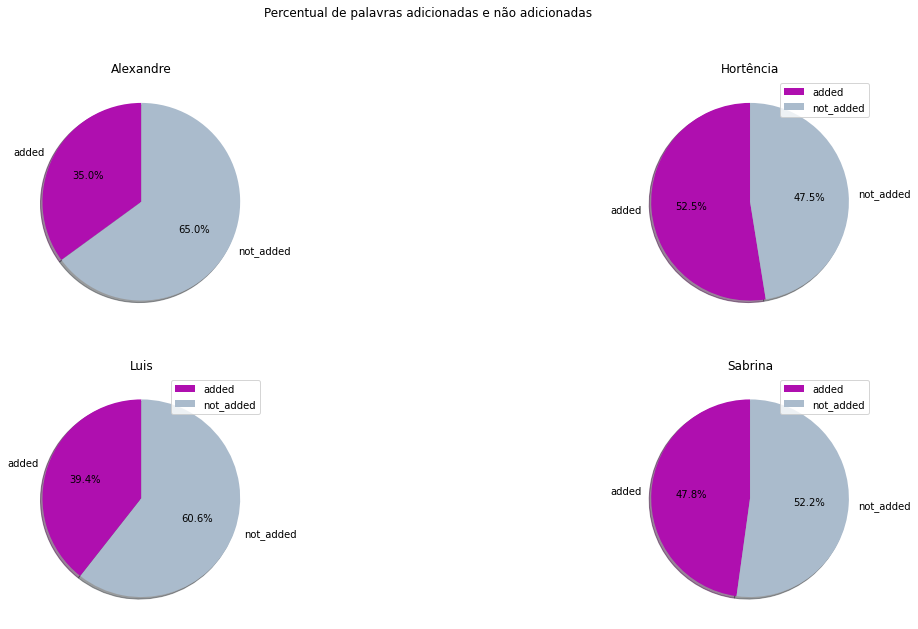

In [ ]:
added_Alexandre = [df_Users['added'][0], df_Users['not_added'][0]]
added_Hortencia = [df_Users['added'][1], df_Users['not_added'][1]]
added_Luis = [df_Users['added'][2], df_Users['not_added'][2]]
added_Sabrina = [df_Users['added'][3], df_Users['not_added'][3]]

fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax[0,0].pie(added_Alexandre, labels=['added', 'not_added'], colors=['#af0faf', '#aabbcc'] , autopct='%.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Alexandre')

ax[0,1].pie(added_Hortencia, labels=['added', 'not_added'], colors=['#af0faf', '#aabbcc'] , autopct='%.1f%%', shadow=True, startangle=90)
ax[0,1].set_title('Hortência')
ax[0,1].legend()

ax[1,0].pie(added_Luis, labels=['added', 'not_added'], colors=['#af0faf', '#aabbcc'] , autopct='%.1f%%', shadow=True, startangle=90)
ax[1,0].set_title('Luis')
ax[1,0].legend()

ax[1,1].pie(added_Sabrina, labels=['added', 'not_added'], colors=['#af0faf', '#aabbcc'] , autopct='%.1f%%', shadow=True, startangle=90)
ax[1,1].set_title('Sabrina')
ax[1,1].legend()

plt.suptitle('Percentual de palavras adicionadas e não adicionadas')
plt.show()

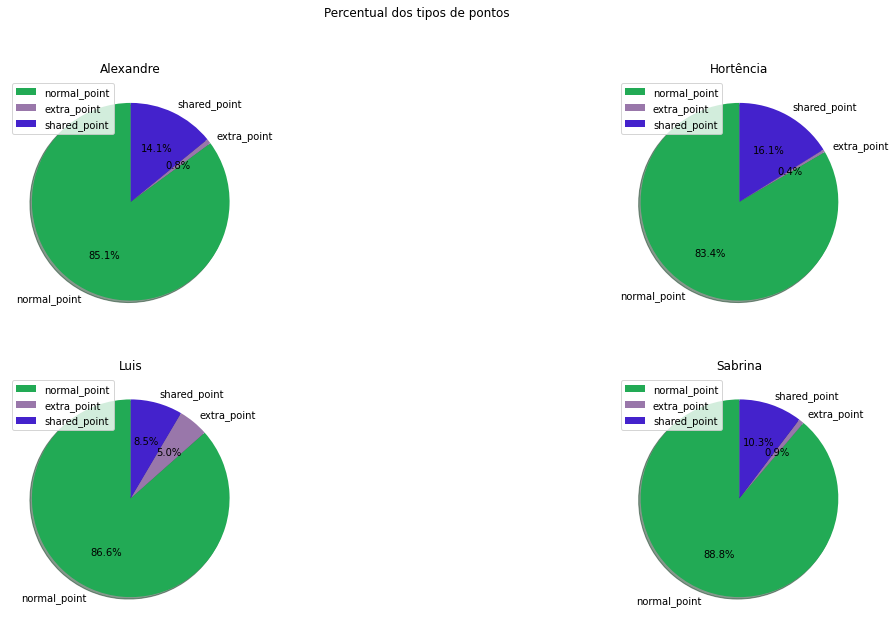

In [ ]:
point_type_Alexandre = [df_Users['normal_point'][0], df_Users['extra_point'][0], df_Users['shared_point'][0]]
point_type_Hortencia = [df_Users['normal_point'][1], df_Users['extra_point'][1], df_Users['shared_point'][1]]
point_type_Luis = [df_Users['normal_point'][2], df_Users['extra_point'][2], df_Users['shared_point'][2]]
point_type_Sabrina = [df_Users['normal_point'][3], df_Users['extra_point'][3], df_Users['shared_point'][3]]

fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax[0,0].pie(point_type_Alexandre, labels=['normal_point', 'extra_point', 'shared_point'], colors=['#22AA55', '#9977AA', '#4422cc'],
            autopct='%.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Alexandre')
ax[0,0].legend()

ax[0,1].pie(point_type_Hortencia, labels=['normal_point', 'extra_point', 'shared_point'], colors=['#22AA55', '#9977AA', '#4422cc'],
            autopct='%.1f%%', shadow=True, startangle=90)
ax[0,1].set_title('Hortência')
ax[0,1].legend()

ax[1,0].pie(point_type_Luis, labels=['normal_point', 'extra_point', 'shared_point'], colors=['#22AA55', '#9977AA', '#4422cc'],
            autopct='%.1f%%', shadow=True, startangle=90)
ax[1,0].set_title('Luis')
ax[1,0].legend()

ax[1,1].pie(point_type_Sabrina, labels=['normal_point', 'extra_point', 'shared_point'], colors=['#22AA55', '#9977AA', '#4422cc'],
            autopct='%.1f%%', shadow=True, startangle=90)
ax[1,1].set_title('Sabrina')
ax[1,1].legend()

plt.suptitle('Percentual dos tipos de pontos')
plt.show()

### Comparações - Usuários

In [ ]:
# Informações para os eixos usados nos gráficos exibidos abaixo

eixo_x = ['Alexandre', 'Hortência', 'Luis', 'Sabrina']

eixo_y_normal_point = [df_Users['normal_point'][0], df_Users['normal_point'][1], df_Users['normal_point'][2], df_Users['normal_point'][3]]

eixo_y_extra_point = [df_Users['extra_point'][0], df_Users['extra_point'][1], df_Users['extra_point'][2], df_Users['extra_point'][3]]

eixo_y_added = [df_Users['added'][0], df_Users['added'][1], df_Users['added'][2], df_Users['added'][3]]

eixo_y_total_score = [df_Users['total_score'][0], df_Users['total_score'][1], df_Users['total_score'][2], df_Users['total_score'][3]]

eixo_y_score_average = [df_Users['score_average'][0], df_Users['score_average'][1], df_Users['score_average'][2], df_Users['score_average'][3]]

eixo_y_total_average = [df_Users['total_average'][0], df_Users['total_average'][1], df_Users['total_average'][2], df_Users['total_average'][3]]

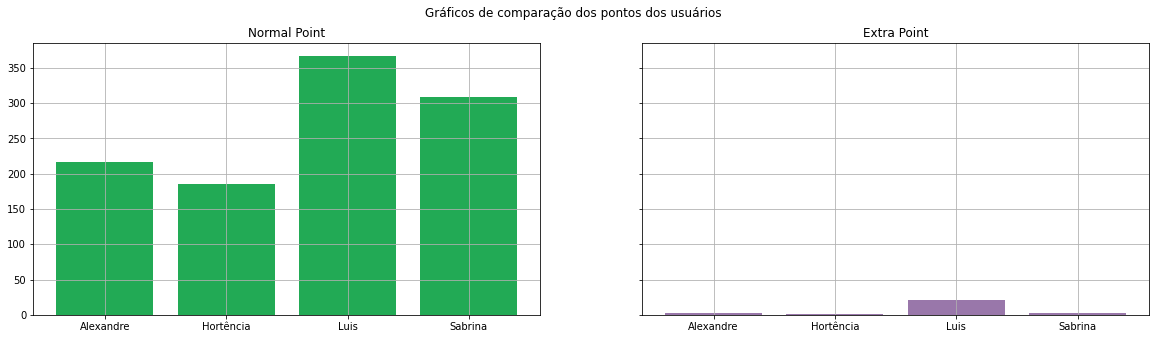

In [ ]:
# Gráficos de comparação dos pontos

fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=True)

axes[0].bar(eixo_x, eixo_y_normal_point, color='#22AA55')
axes[0].set_title('Normal Point')
axes[0].grid(True)

axes[1].bar(eixo_x, eixo_y_extra_point, color='#9977AA')
axes[1].set_title('Extra Point')
axes[1].grid(True)

plt.suptitle('Gráficos de comparação dos pontos dos usuários')
plt.show()

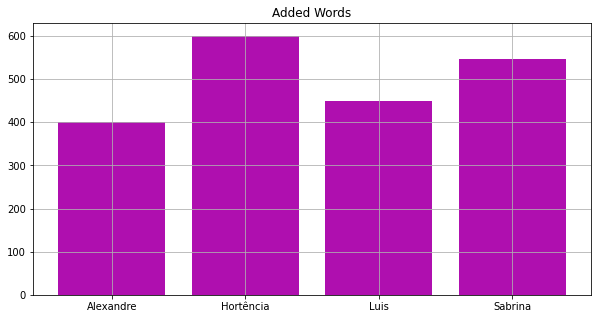

In [ ]:
# Gráfico de palavras adicionadas
fig, axe = plt.subplots(figsize=(10,5))

axe.bar(eixo_x, eixo_y_added, color='#AF0FAF')
axe.set_title('Added Words')
axe.grid(True)

plt.show()

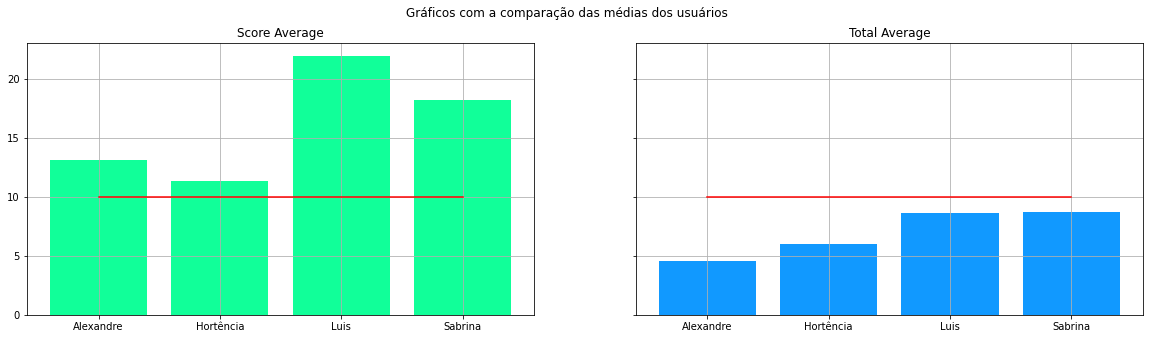

In [ ]:
# Gráficos com a comparação da média dos usuários

fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=True)

axes[0].bar(eixo_x, eixo_y_score_average, color='#11FF99')
axes[0].plot(eixo_x, [10, 10, 10, 10], color='#FF0000')
axes[0].set_title('Score Average')
axes[0].grid(True)

axes[1].bar(eixo_x, eixo_y_total_average, color='#1199FF')
axes[1].plot(eixo_x, [10, 10, 10, 10], color='#FF0000')
axes[1].set_title('Total Average')
axes[1].grid(True)

plt.suptitle('Gráficos com a comparação das médias dos usuários')
plt.show()

## Verificar Repetição de Conteúdo

In [ ]:
table_statistics[0][0]

'Chapter I'

In [ ]:
general_content = []
source = []

for table_statistics in table_statistics_list:
  print(table_statistics[0][0])
  table_contents = table_statistics[5]
  words_list = []
  phrase_list = []
  for content in table_contents:
    # if len(content.split()) <= 2:
    #   translated_words.append(content.lower())
    # else:
    #   phrase_list.append(content.lower())
    general_content.append(content.lower())
    source.append(table_statistics[0][0])

Tabela Cozinha
Tabela Quarto
Tabela Banheiro
Tabela Restaurante
Tabela Geral
Tabela Música III
Tabela Música II
Tabela Música I
Revisão Quarto e Cozinha
Tabela Floresta
Tabela Geral II
Chapter I


In [ ]:
len(general_content)

1164

In [ ]:
word_counter = 0
phrase_counter = 0
print("Palavras Repetidas: ")

for c in range(0, len(general_content)):
  content = general_content[c]
  count = general_content.count(content)
  if count > 1:
    print(f"\n'{content}' aparece {count} vezes. Uma delas na tabela {source[c]}\n")
  if len(content.split()) <= 2:
      word_counter += 1
  else:
      phrase_counter += 1

Palavras Repetidas: 


In [ ]:
print(f"Quantidade de palavras: {word_counter}")
print(f"\nQuantidade de frases: {phrase_counter}")

Quantidade de palavras: 667

Quantidade de frases: 497


# Nova seção

## Testando a biblioteca docx2python

### Lendo o documento

In [ ]:
# Lê o arquivo usando o caminho do arquivo como parâmetro

endereco_documento = '/content/drive/MyDrive/Projeto Inglês/Palavras - Frases.docx'

documento = docx2python(endereco_documento)

In [ ]:
documento

DocxContent(docx_reader=DocxReader(), docx2python_kwargs={'docx_filename': '/content/drive/MyDrive/Projeto Inglês/Palavras - Frases.docx', 'image_folder': None, 'html': False, 'paragraph_styles': False, 'extract_image': None, 'docx_context': DocxReader()})

In [ ]:
# Atributo que mostra o corpo do documento (.body) => Retorna uma lista com paragrafos tabelas e imagens contidas no documento

documento.body

[[[['Tabela Música III']]],
 [[['Quem inseriu'],
   ['Extra'],
   ['Palavras / Frases (Inglês)'],
   ['Tradução'],
   ['Contexto / Descrição'],
   ['Alexandre (1)'],
   ['Hortência (2)'],
   ['Luis (3)'],
   ['Sabrina (4)']],
  [['3'],
   [''],
   ['Load up your guns and bring your friends'],
   ['Carregue suas armas e traga seus amigos'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ["It's fun to lose and to pretend"],
   ['É divertido perder e fingir'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ["She's overbored and self assured"],
   ['Ela está entediada e auto-confiante'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ["I'm worse at what I do best"],
   ['Sou o pior no que faço de melhor'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ['And for this gift I feel blessed'],
   ['E por esta dádiva me sinto abençoado'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   

In [ ]:
documento.body[0]

[[['Tabela Música III']]]

In [ ]:
documento.body[1]

[[['Quem inseriu'],
  ['Extra'],
  ['Palavras / Frases (Inglês)'],
  ['Tradução'],
  ['Contexto / Descrição'],
  ['Alexandre (1)'],
  ['Hortência (2)'],
  ['Luis (3)'],
  ['Sabrina (4)']],
 [['3'],
  [''],
  ['Load up your guns and bring your friends'],
  ['Carregue suas armas e traga seus amigos'],
  [''],
  [''],
  ['X'],
  ['X'],
  ['X']],
 [['3'],
  [''],
  ["It's fun to lose and to pretend"],
  ['É divertido perder e fingir'],
  [''],
  [''],
  ['X'],
  ['X'],
  ['X']],
 [['3'],
  [''],
  ["She's overbored and self assured"],
  ['Ela está entediada e auto-confiante'],
  [''],
  [''],
  ['X'],
  ['X'],
  ['X']],
 [['3'],
  [''],
  ["I'm worse at what I do best"],
  ['Sou o pior no que faço de melhor'],
  [''],
  [''],
  ['X'],
  ['X'],
  ['X']],
 [['3'],
  [''],
  ['And for this gift I feel blessed'],
  ['E por esta dádiva me sinto abençoado'],
  [''],
  [''],
  ['X'],
  ['X'],
  ['X']],
 [['3'],
  [''],
  ['Our little group has always been'],
  ['Nosso pequeno grupo sempre existiu

In [ ]:
documento.body[2]

[[['', '', 'Tabela Música II']]]

In [ ]:
documento.body[3]

[[['Quem inseriu'],
  ['Extra'],
  ['Palavras / Frases (Inglês)'],
  ['Tradução'],
  ['Contexto / Descrição'],
  ['Alexandre (1)'],
  ['Hortência (2)'],
  ['Luis (3)'],
  ['Sabrina (4)']],
 [['2'],
  [''],
  ['Do you ever feel'],
  ['Você já se sentiu'],
  [''],
  [''],
  ['X'],
  [''],
  ['X']],
 [['2'],
  [''],
  ['Like a plastic bag'],
  ['Como uma sacola plástica'],
  [''],
  [''],
  ['X'],
  [''],
  ['X']],
 [['2'],
  [''],
  ['Drifting through the wind'],
  ['Voando com o vento'],
  [''],
  [''],
  ['Z'],
  [''],
  ['X']],
 [['2'],
  [''],
  ['Wanting to start again'],
  ['Querendo começar de novo'],
  [''],
  [''],
  ['X'],
  [''],
  ['X']],
 [['2'],
  [''],
  ['Just own the night', '', ''],
  ['Apenas mande na noite'],
  [''],
  [''],
  ['X'],
  [''],
  ['X']],
 [['2'],
  [''],
  ['Six feet under'],
  ['Seis pés abaixo '],
  [''],
  [''],
  ['X'],
  [''],
  ['X']],
 [['2'],
  [''],
  ["You're gonna leave them all in awe"],
  ['Você deixa todos admirados'],
  [''],
  [''],
  ['X

In [ ]:
documento.body[4]

[[['', '', 'Tabela Cozinha']]]

In [ ]:
print(len(documento.body))
print(len(documento.body[0]))
print(len(documento.body[1]))
print(len(documento.body[2]))
print(len(documento.body[3]))
print(len(documento.body[4]))
print(len(documento.body[5]))
print(len(documento.body[6]))
print(len(documento.body[7]))
print(len(documento.body[8]))
print(len(documento.body[9]))
print(len(documento.body[10]))

41
1
48
1
34
1
63
1
46
1
56
1


### Montando e estruturando o DataFrame

In [ ]:
colunas = [column for column in documento.body[1][0:1][0]]
colunas

[['Quem inseriu'],
 ['Extra'],
 ['Palavras / Frases (Inglês)'],
 ['Tradução'],
 ['Contexto / Descrição'],
 ['Alexandre (1)'],
 ['Hortência (2)'],
 ['Luis (3)'],
 ['Sabrina (4)']]

In [ ]:
def concatena(listaStrings):
  if listaStrings == ['']:
    string = "-"
  else:
    string = ""
    for i, s in enumerate(listaStrings):
      if i == len(listaStrings) - 1:
        string += s
      else:
        string += s + ' '
  return string

In [ ]:
colunas = [concatena(column) for column in colunas]
colunas

['Quem inseriu',
 'Extra',
 'Palavras / Frases (Inglês)',
 'Tradução',
 'Contexto / Descrição',
 'Alexandre (1)',
 'Hortência (2)',
 'Luis (3)',
 'Sabrina (4)']

In [ ]:
documento.body

[[[['Tabela Música III']]],
 [[['Quem inseriu'],
   ['Extra'],
   ['Palavras / Frases (Inglês)'],
   ['Tradução'],
   ['Contexto / Descrição'],
   ['Alexandre (1)'],
   ['Hortência (2)'],
   ['Luis (3)'],
   ['Sabrina (4)']],
  [['3'],
   [''],
   ['Load up your guns and bring your friends'],
   ['Carregue suas armas e traga seus amigos'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ["It's fun to lose and to pretend"],
   ['É divertido perder e fingir'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ["She's overbored and self assured"],
   ['Ela está entediada e auto-confiante'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ["I'm worse at what I do best"],
   ['Sou o pior no que faço de melhor'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   [''],
   ['And for this gift I feel blessed'],
   ['E por esta dádiva me sinto abençoado'],
   [''],
   [''],
   ['X'],
   ['X'],
   ['X']],
  [['3'],
   

In [ ]:
dataFrame = pd.DataFrame(documento.body[9][1:])
dataFrame.columns = colunas
dataFrame

,Quem inseriu,Extra,Palavras / Frases (Inglês),Tradução,Contexto / Descrição,Alexandre (1),Hortência (2),Luis (3),Sabrina (4)
0,[4],[],[Bed],"[Cama, leito, canteiro, colchão, alicerce ]",[],[X],[X],[X],[X]
1,[4],[],[My cat likes to lie on my bed],[Meu gato gosta de deitar na minha cama],[],[X],[X],[X],[X]
2,[-],[],[lie],"[mentira, mentir, falsidade, deitar]",[],[X],[X],[X],[X]
3,[-],[],[lay],"[colocar, deitar, leigo]",[],[X],[X],[X],[X]
4,[-],[],[I lay all my books on the desk before studyin...,[Eu coloco todos os meus livros na mesa antes ...,[],[X],[X],[X],[X]
5,[-],[],[The mother carefully laid her baby on the bed.],[A mãe deitou o seu bebê com cuidado na cama.],[],[X],[X],[X],[X]
6,[-],[],[Lay people do not always understand technical...,[Pessoas leigas nem sempre compreendem termos ...,[],[X],[X],[X],[X]
7,[4],[],[Pillow],"[Travesseiro, almofada, descanso, suporte...]",[],[x],[X],[X],[X]
8,[4],[],[The pillows on my bed are very soft],[Os travesseiros na minha cama são bem macios],[],[x],[X],[X],[X]
9,[4],[],[Blanket],"[Cobertor, manta, manto, camada, coberta]",[],[X],[X],[X],[X]


In [ ]:
for column in colunas:
  dataFrame[column] = dataFrame[column].apply(lambda x: concatena(x))
dataFrame

,Quem inseriu,Extra,Palavras / Frases (Inglês),Tradução,Contexto / Descrição,Alexandre (1),Hortência (2),Luis (3),Sabrina (4)
0,3,-,I Still Haven't Found What I'm Looking For,Eu ainda não achei o que estou procurando,-,-,-,X,X
1,3,-,I have climbed the highest mountains,Eu escalei as mais altas montanhas,-,-,-,X,X
2,3,-,I have run through the fields,Eu corri através dos campos,-,-,-,X,X
3,3,-,Only to be with you,Apenas para estar com você,-,-,-,X,X
4,3,-,I have scaled these city walls,Eu escalei estes muros da cidade,-,-,-,X,X
5,3,-,It burned like fire,Queimava como fogo,-,-,-,X,X
6,3,-,This burning desire,Este desejo ardente,-,-,-,X,X
7,3,-,I have spoken with the tongue of angels,Eu falei na língua dos anjos,-,-,-,X,X
8,3,-,I have held the hand of the devil,Eu segurei na mão do demônio,-,-,-,X,X
9,3,-,I was cold as a stone,Eu estava frio como uma pedra,-,-,-,X,X


## Nova seção

In [ ]:
def lerDocumento(endereco):               # Lê o arquivo com a Documento e transforma numa listaDocumento
    arquivo = open(endereco,'rb')
    if (arquivo == ''):
        print("Erro ao carregar arquivo")
        arquivo.close()
        return []
    else:
        listaDocumento = arquivo.readlines()
        arquivo.close()
        return listaDocumento

In [ ]:
endereco_documento = '/content/drive/MyDrive/Inglês/Projeto Inglês/Palavras - Frases.docx'
documento = lerDocumento(endereco_documento)

In [ ]:
documento

[b'PK\x03\x04\x14\x00\x08\x08\x08\x002\x95\x07S\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\x00\x00\x00word/numbering.xml\xa5\x93MN\xc30\x10\x85O\xc0\x1d"\xef\xdb$\x15 \x145\xed\x82\n',
 b'6\xec\x80\x03\xb8\x8e\x93X\xb5=\xd6\xd8I\xe8\xedq\x9b\xbfR$\x94\x86U\xe4\x8c\xdf\xf7\xc6\xe3\xe7\xf5\xf6K\xc9\xa0\xe6h\x05\xe8\x94\xc4\xcb\x88\x04\\3\xc8\x84.R\xf2\xf9\xf1\xb2x"\x81uTgT\x82\xe6)9rK\xb6\x9b\xbbu\x93\xe8J\xed9\xfa}\x81Gh\x9b(\x96\x92\xd29\x93\x84\xa1e%W\xd4.\xc1p\xed\x8b9\xa0\xa2\xce/\xb1\x08\x15\xc5Ce\x16\x0c\x94\xa1N\xec\x85\x14\xee\x18\xae\xa2\xe8\x91t\x18HI\x85:\xe9\x10\x0b%\x18\x82\x85\xdc\x9d$\t\xe4\xb9`\xbc\xfb\xf4\n',
 b"\x9c\xe2\xdbJv\xc0*\xc5\xb5;;\x86\xc8\xa5\xef\x01\xb4-\x85\xb1=M\xcd\xa5\xf9b\xd9C\xea\xbf\x0eQ+\xd9\xefk\xcc\x14\xb7\x0ci\xe3\xe7\xacdk\xd4\x00f\x06\x81qk\xfd\xdf][\x1c\x88q4a\x80'\xc4\xa0\x98\xd2\xc2O\xcf\xbe\x13E\x85\x1e0\xa7t\\\x81\x06\xef\xa5\xf7\xee\x86vF\x8d\x07\x19ga\xe5\x94F\xda\xd2\x9b\xd8#\xc5\xe3\xef.\xe8\x8cy^\xea\x8d\x98\x94\xe2+\x82W\xb9\

In [ ]:
pip install python-docx

     |████████████████████████████████| 5.6 MB 20.7 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=8006e1bef7fa2c0b674cbb04df16d6844e38caef4b892b2562c88ad56477cc65
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [ ]:
endereco_documento = '/content/drive/MyDrive/Inglês/Projeto Inglês/Palavras - Frases.docx'

from docx import Document

document = Document(endereco_documento)

In [ ]:
for p in document.paragraphs:
    print(p.text)

Tabela Geral


Tabela Restaurante



In [ ]:
for t in document.tables:
  print(t.cell)

<bound method Table.cell of <docx.table.Table object at 0x7fcba89ee2d0>>
<bound method Table.cell of <docx.table.Table object at 0x7fcba89eee50>>


In [ ]:
data = open(endereco_documento, 'r', encoding="ISO-8859-1")

In [ ]:
listaDocumento = data.readlines()

In [ ]:
listaDocumento

['PK\x03\x04\x14\x00\x08\x08\x08\x002\x95\x07S\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\x00\x00\x00word/numbering.xml¥\x93MNÃ0\x10\x85OÀ\x1d"ïÛ$\x15 \x145í\x82\n',
 '6ì\x80\x03¸\x8e\x93Xµ=ÖØIèíq\x9b¿R$\x94\x86Uä\x8cß÷ÆãçõöKÉ\xa0æh\x05è\x94ÄË\x88\x04\\3È\x84.Ròùñ²x"\x81uTgT\x82æ)9rK¶\x9b»u\x93èJí9ú}\x81Gh\x9b(\x96\x92Ò9\x93\x84¡e%WÔ.Ápí\x8b9\xa0¢Î/±\x08\x15ÅCe\x16\x0c\x94¡Nì\x85\x14î\x18®¢è\x91t\x18HI\x85:é\x10\x0b%\x18\x82\x85Ü\x9d$\tä¹`¼ûô\n',
 "\x9câÛJvÀ*Åµ;;\x86È¥ï\x01´-\x85±=MÍ¥ùbÙCê¿\x0eQ+ÙïkÌ\x14·\x0ciãç¬dkÔ\x00f\x06\x81qkýß][\x1c\x88q4a\x80'Ä\xa0\x98ÒÂOÏ¾\x13E\x85\x1e0§t\\\x81\x06ï¥÷î\x86vF\x8d\x07\x19gaå\x94FÚÒ\x9bØ#Åãï.è\x8cy^ê\x8d\x98\x94â+\x82W¹\n",
 '\x87@ÎA°\x92¢ë\x01r\x0eA\x02;ðì\x99ê\x9a\x0eaÎ\x8aIq¾"e\x82\x16HÕ\x18R{ÓÍÆÑU\\ÞKjøH+þG{E¨Ì\x18÷û9´\x8b\x17\x18?Ü\x06Xõ\x80pó\n',
 'PK\x07\x08I\x13C\x7fh\x01\x00\x00=\x05\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x002\x95\x07S\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00word/settings.xml¥\x95ÍnÛ0\x0cÇ\x